In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler





In [2]:

# Load the Iris dataset
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['species'] = iris.target

In [3]:
# Map target values to species names
df['species'] = df['species'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

In [4]:

# Data Preprocessing: Standardization
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df.iloc[:, :-1]), columns=iris.feature_names)
df_scaled['species'] = df['species']


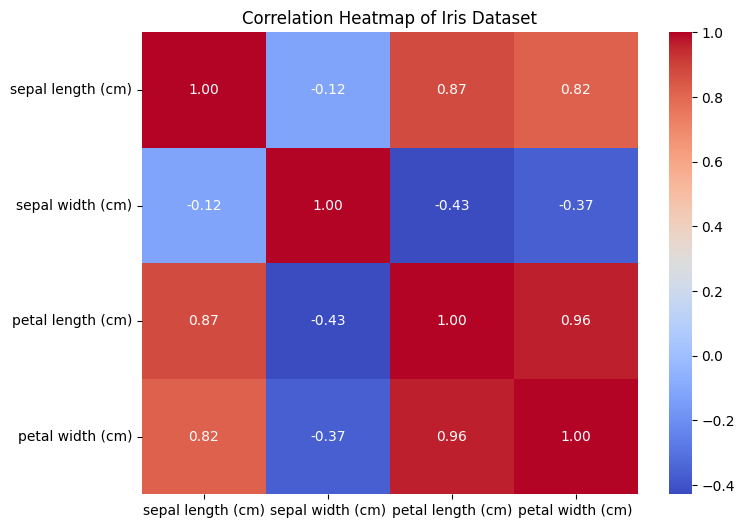

In [5]:

# Generate a heatmap of the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(df.iloc[:, :-1].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Iris Dataset')
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

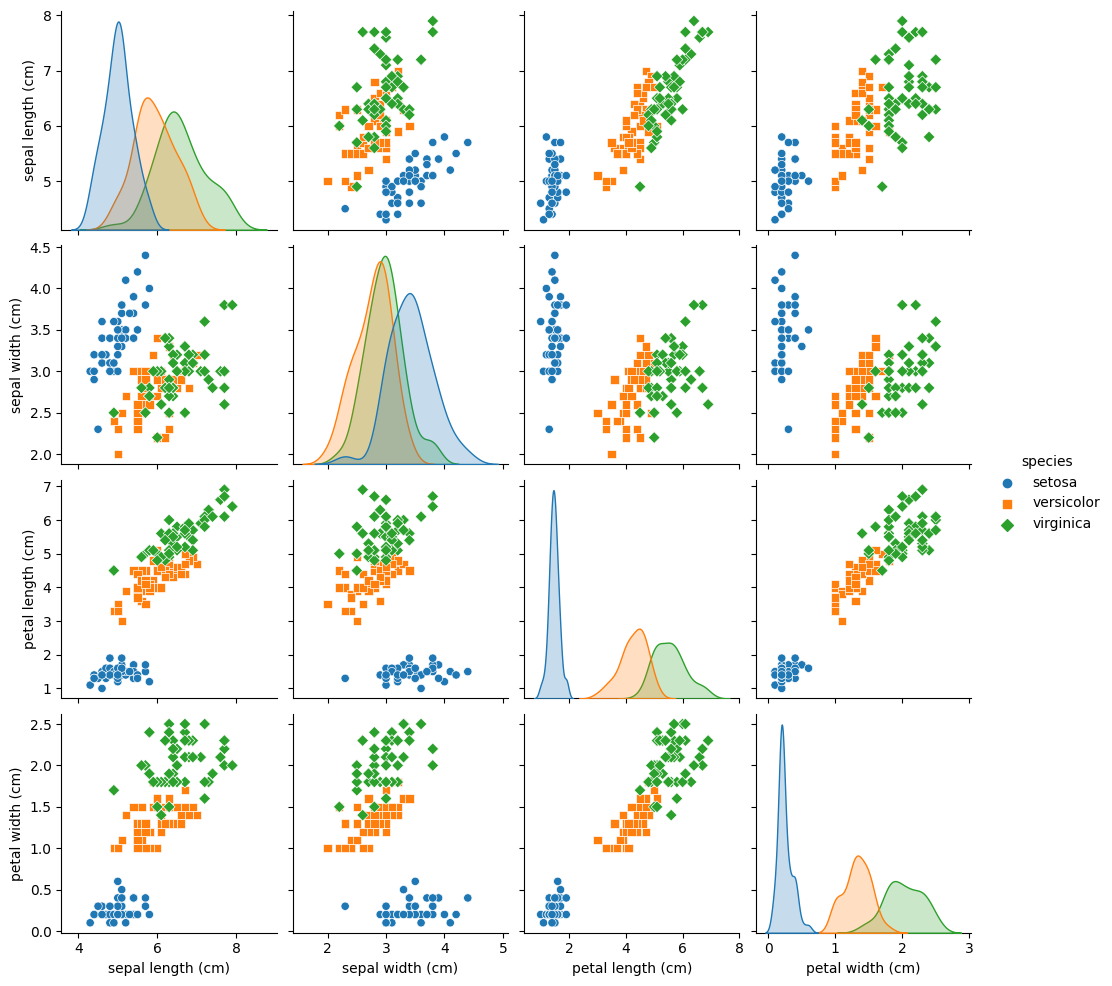

In [6]:


# Pairplot for visualization
sns.pairplot(df, hue='species', markers=['o', 's', 'D'])
plt.show()


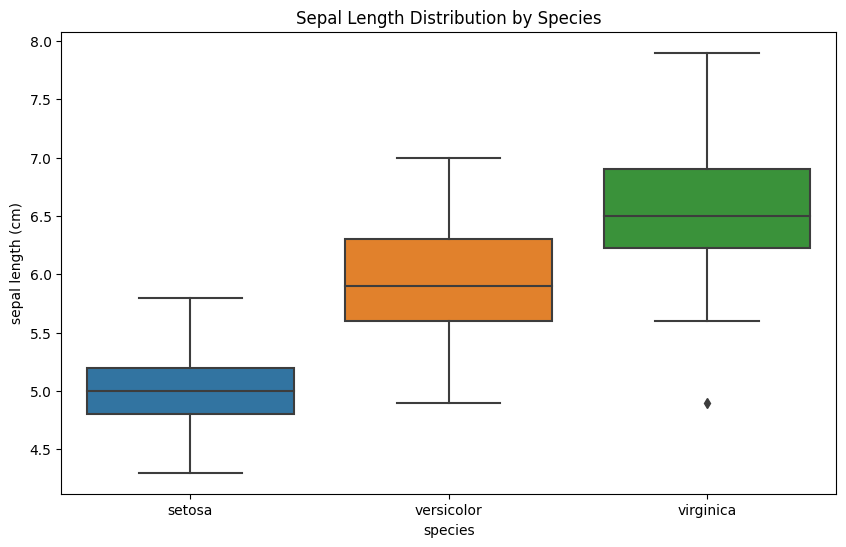

In [7]:

# Boxplot for feature distribution across species
plt.figure(figsize=(10, 6))
sns.boxplot(x='species', y='sepal length (cm)', data=df)
plt.title('Sepal Length Distribution by Species')
plt.show()


In [8]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(iris['data'])




In [9]:
# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, iris['target'], test_size=0.25, random_state=0
)

In [10]:
# Print the shapes of the resulting datasets
print("X_train shape: {}".format(X_train.shape))
print("y_train shape: {}".format(y_train.shape))
print("X_test shape: {}".format(X_test.shape))
print("y_test shape: {}".format(y_test.shape))

X_train shape: (112, 4)
y_train shape: (112,)
X_test shape: (38, 4)
y_test shape: (38,)


In [11]:
# Visualization of the shapes
shapes = {
    'X_train': X_train.shape[0],
    'y_train': y_train.shape[0],
    'X_test': X_test.shape[0],
    'y_test': y_test.shape[0]
}


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


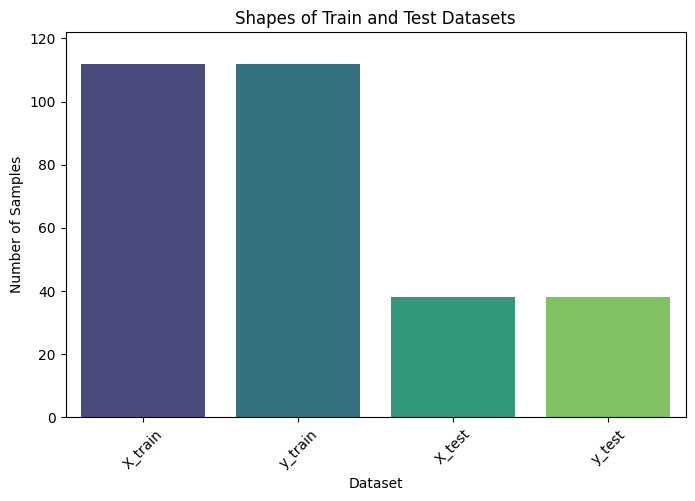

In [12]:
# Create a bar plot
plt.figure(figsize=(8, 5))
sns.barplot(x=list(shapes.keys()), y=list(shapes.values()), palette='viridis')
plt.title('Shapes of Train and Test Datasets')
plt.ylabel('Number of Samples')
plt.xlabel('Dataset')
plt.xticks(rotation=45)
plt.ylim(0, max(shapes.values()) + 10)  # Add some space above the highest bar
plt.show()